# Outlier Detection with IQR (Interquartile Range)

## Objective
The **Interquartile Range (IQR)** is a measure of statistical dispersion, representing the difference between the 75th and 25th percentiles. This method is widely used for detecting outliers as part of data preprocessing. The goal of this lab is to apply the IQR algorithm for outlier detection.

## Prerequisites
Before proceeding, ensure you have completed all the content in submodule 3.2, specifically the lecture slides on the IQR algorithm. Familiarity with these concepts is crucial for understanding and implementing the outlier detection technique described here.

## IQR Algorithm for Outlier Detection
Follow these steps to detect outliers using the IQR method:
1. Arrange the data in ascending order.
2. Calculate the first quartile (Q1).
3. Calculate the third quartile (Q3).
4. Compute the IQR as $\(IQR = Q3 - Q1\)$.
5. Determine the lower bound $\(T_{\text{lower}} = Q1 - (1.5 \times IQR)\)$.
6. Determine the upper bound $\(T_{\text{upper}} = Q3 + (1.5 \times IQR)\)$.
7. Identify outliers. Data points outside the range $\([T_{\text{lower}}, T_{\text{upper}}]\)$ are considered outliers and should be filtered out.

## Instructions
- Implement the IQR algorithm using Python.
- Apply the algorithm to detect and remove outliers from the "LotArea" attribute in the training dataset of the House Price Prediction. This data can be found in `train.csv' and can be downloaded [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview).
- Compare the original and preprocessed datasets by plotting their distributions. Use box plots for this comparison, following the examples provided in the [matplotlib boxplot demo](https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py).

This exercise will help you understand how to identify and remove outliers, improving the quality of your data for predictive modeling.

In [2]:
# !pip install scikit-learn 
import pandas as pd
import matplotlib.pyplot as plt

### 1. Laod data form csv using pandas

In [32]:
data = pd.read_csv('train.csv')

### Use describe to get overall statistics 

In [33]:
# use describe function for all data here
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2. Use descirbe the determine the values Q1, Q2, and Q3 for LotArea

In [34]:
# use describe to determine Q1, Q2 and Q3 for LotArea here
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

### Compute Q1, Q3 and IQR using the .quantile funciton 

In [35]:
# code to compute Q1 and Q3 using quantile function here
q1 = data['LotArea'].quantile(0.25)
q3 = data['LotArea'].quantile(0.75)
IQR = q3 - q1
print(f"Q1: {q1}\nQ3: {q3}\nIQR (Q3 - Q1): {IQR}")

Q1: 7553.5
Q3: 11601.5
IQR (Q3 - Q1): 4048.0


### Determine the upper and lower bounds. Any value outside of this will be outliners

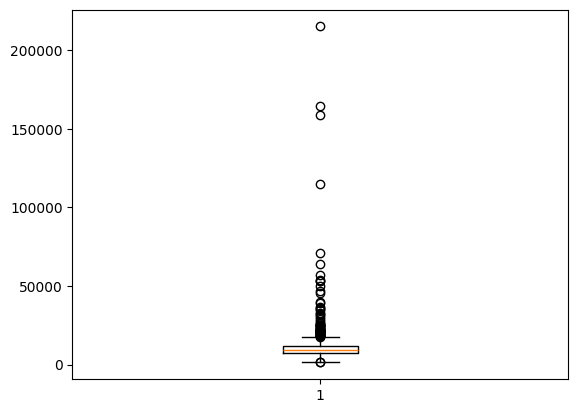

In [36]:
# code to determine upper and lower bounds here

def get_outliers(df: pd.DataFrame, attribute: str, q1: float, q3: float):
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    return df[(df['LotArea'] < lower_bound) | (df['LotArea'] > upper_bound)]

def strip_outliers(df: pd.DataFrame, attribute: str, q1: float, q3: float):
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    return df[(df['LotArea'] >= lower_bound) | (df['LotArea'] <= upper_bound)]

### 5. Find outliers
Filter using upper and lower

In [48]:
# code to identify outliers here
outliers = get_outliers(data, 'LotArea', q1, q3)
outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
66,67,20,RL,NaN,19900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,180000
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000
120,121,80,RL,NaN,21453,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,180000
159,160,60,RL,134.0,19378,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000
1409,1410,60,RL,46.0,20544,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2008,WD,Normal,215000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970
1430,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140


### 6. Remove the outliers. Drop rows that are not in the [lower, upper]

In [49]:
# code to remove outliers here
data_no_outliers = strip_outliers(data, 'LotArea', q1, q3)
data_no_outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Compare the box plots

#### Create a box plot with orginal data

<Axes: >

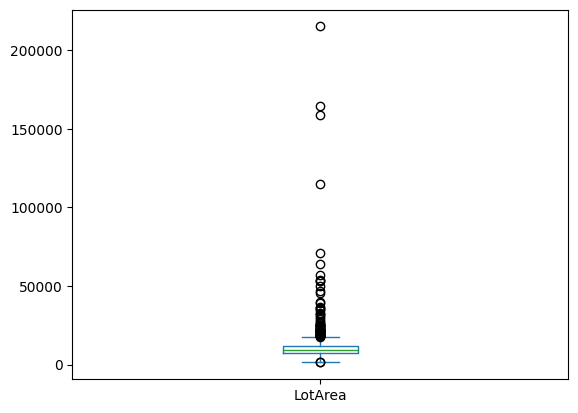

In [50]:
# box plot code here
data['LotArea'].plot(kind='box')

#### Create a box plot with outliers removed

<Axes: >

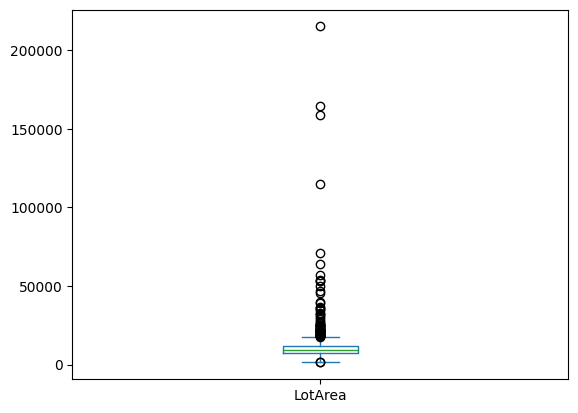

In [53]:
# outliers removed box plot code here
data_no_outliers['LotArea'].plot(kind='box')

### Comment on the differences between both box plots